<a href="https://colab.research.google.com/github/puttu001/puttu001/blob/main/mcsfinf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf

Importing data of different companies for 10 years from Yahoo Finance.

In [ ]:
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2022-01-01')

#importing stocks
nike = yf.download('NKE',start,end)
gs = yf.download('gs',start,end)
apple = yf.download('AAPL',start,end)
itc = yf.download('ITC.NS',start,end)
google = yf.download('GOOG',start,end)
ongc = yf.download('ONGC.NS',start,end)
oracle = yf.download('ORCL',start,end)
amazon = yf.download('AMZN',start,end)
uber = yf.download('UBER',start,end)
#importing bonds
vanguard = yf.download('VWEHX',start,end)
ubs = yf.download('BISCX',start,end)
artisan = yf.download('APHYX',start,end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Manipulation of above data

In [ ]:
#showing data of one company
google.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981


In [ ]:
print(nike.shape,gs.shape,apple.shape,itc.shape,google.shape,ongc.shape,oracle.shape,amazon.shape,vanguard.shape,uber.shape,ubs.shape,artisan.shape)

(2517, 6) (2517, 6) (2517, 6) (2465, 6) (2517, 6) (2465, 6) (2517, 6) (2517, 6) (2517, 6) (668, 6) (2517, 6) (1641, 6)


In [ ]:
#extracting only closing values
nike = nike[['Adj Close']]
gs = gs[['Adj Close']]
apple = apple[['Adj Close']]
itc = itc[['Adj Close']]
google = google[['Adj Close']]
ongc = ongc[['Adj Close']]
oracle = oracle[['Adj Close']]
amazon = amazon[['Adj Close']]
vanguard = vanguard[['Adj Close']]
uber = uber[['Adj Close']]
ubs = ubs[['Adj Close']]
artisan = artisan[['Adj Close']]

In [ ]:
#showing closing values only
dataframes = [nike, gs, apple, itc, google, ongc, oracle, amazon, vanguard, uber, ubs, artisan]
investments = dataframes[0]
for df in dataframes[1:]:
    investments = investments.join(df, how='outer', rsuffix=df.columns[0])
investments.columns = ['nike', 'gs', 'apple', 'itc', 'google', 'ongc', 'oracle', 'amazon', 'vanguard', 'uber','ubs','artisan']
investments = investments.dropna()
investments

,nike,gs,apple,itc,google,ongc,oracle,amazon,vanguard,uber,ubs,artisan
Date,,,,,,,,,,,,
2019-05-10,80.247131,181.612045,47.762623,246.770981,58.213501,128.417404,50.777245,94.499001,4.794151,41.570000,13.720500,11.705607
2019-05-13,78.889755,175.248215,44.986687,239.767731,56.601501,126.718575,49.643696,91.134003,4.769312,37.099998,13.213056,11.311036
2019-05-14,79.979500,176.425690,45.698845,243.953156,56.021999,126.757164,50.294090,92.005997,4.777592,39.959999,13.414731,11.442560
2019-05-15,80.304489,176.533554,46.246277,246.190796,58.210499,125.676064,50.693623,93.557503,4.777592,41.290001,13.466778,11.565315
2019-05-16,80.562584,178.996368,46.042797,244.284637,58.949001,128.147141,50.767952,95.378502,4.777592,43.000000,13.590384,11.644230
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,164.233994,369.460449,178.527786,203.284943,148.063995,122.816940,86.695831,169.669495,5.573962,42.959999,24.465954,22.237299
2021-12-28,163.097137,369.050964,177.498154,205.621017,146.447998,124.739456,85.834099,170.660995,5.573962,42.540001,24.208918,22.088120
2021-12-29,165.410019,367.708466,177.587265,202.537399,146.504501,124.202942,85.408089,169.201004,5.573962,42.459999,24.256517,21.839493


In [ ]:
investments.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 638 entries, 2019-05-10 to 2021-12-31
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   nike      638 non-null    float64
 1   gs        638 non-null    float64
 2   apple     638 non-null    float64
 3   itc       638 non-null    float64
 4   google    638 non-null    float64
 5   ongc      638 non-null    float64
 6   oracle    638 non-null    float64
 7   amazon    638 non-null    float64
 8   vanguard  638 non-null    float64
 9   uber      638 non-null    float64
 10  ubs       638 non-null    float64
 11  artisan   638 non-null    float64
dtypes: float64(12)
memory usage: 64.8 KB


Market Conditions

In [ ]:
mean_daily_return = investments.pct_change(1).mean()
mean_daily_return

nike        0.001328
gs          0.001381
apple       0.002290
itc        -0.000103
google      0.001610
ongc        0.000361
oracle      0.001008
amazon      0.001070
vanguard    0.000249
uber        0.000717
ubs         0.001066
artisan     0.001141
dtype: float64

<Axes: xlabel='Date'>

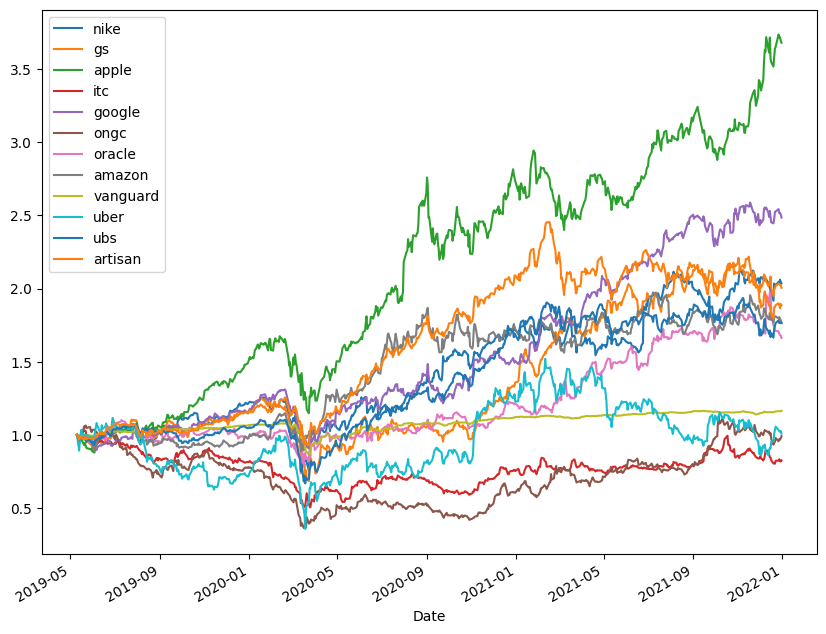

In [ ]:
#plotting nomalised stocks
stock_normed = investments/investments.iloc[0]
stock_normed.plot(figsize=(10,8))


In [ ]:
import matplotlib.pyplot as plt

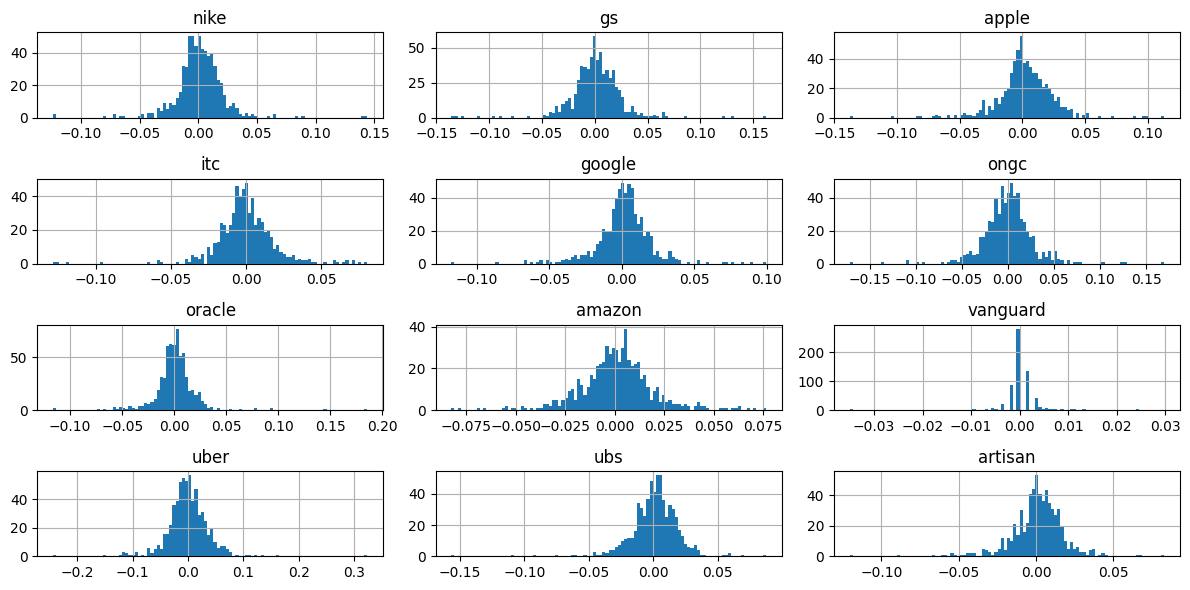

In [ ]:
log_return = np.log(investments/investments.shift(1))

log_return.hist(bins=100,figsize=(12,6));
plt.tight_layout()

In [ ]:
log_return.describe()

,nike,gs,apple,itc,google,ongc,oracle,amazon,vanguard,uber,ubs,artisan
count,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000
mean,0.001116,0.001092,0.002046,-0.000301,0.001429,-0.000013,0.000798,0.000891,0.000239,0.000014,0.000892,0.000997
std,0.020547,0.023988,0.022058,0.019952,0.018951,0.027372,0.020392,0.018894,0.004414,0.037366,0.018692,0.017011
min,-0.124053,-0.135880,-0.137708,-0.128740,-0.117667,-0.171533,-0.116554,-0.082535,-0.035023,-0.243713,-0.156698,-0.120413
25%,-0.007782,-0.010221,-0.007289,-0.009180,-0.006240,-0.013699,-0.006585,-0.008482,0.000000,-0.017349,-0.008030,-0.006258
50%,0.000800,0.000662,0.001509,-0.000862,0.002030,0.001023,0.001119,0.001083,0.000000,-0.000442,0.002164,0.001794
75%,0.010952,0.012845,0.013457,0.009036,0.010102,0.012401,0.008647,0.010506,0.001688,0.018964,0.011429,0.010168
max,0.144372,0.161952,0.113158,0.080969,0.099380,0.169822,0.185875,0.076308,0.029853,0.323959,0.087495,0.082833


In [ ]:
#annual mean
log_return.mean() * 252

nike        0.281170
gs          0.275310
apple       0.515503
itc        -0.075781
google      0.360160
ongc       -0.003356
oracle      0.201201
amazon      0.224588
vanguard    0.060289
uber        0.003411
ubs         0.224792
artisan     0.251252
dtype: float64

In [ ]:
#annual covariance
log_return.cov() * 252

,nike,gs,apple,itc,google,ongc,oracle,amazon,vanguard,uber,ubs,artisan
nike,0.106391,0.072141,0.058623,0.019435,0.049240,0.020023,0.041694,0.034150,0.010373,0.073780,0.060435,0.051227
gs,0.072141,0.145008,0.070163,0.025358,0.062910,0.025003,0.060079,0.036845,0.012866,0.106609,0.076461,0.059838
apple,0.058623,0.070163,0.122614,0.016993,0.070609,0.018996,0.057810,0.068864,0.010304,0.065374,0.067387,0.062437
itc,0.019435,0.025358,0.016993,0.100315,0.016469,0.053910,0.019782,0.013826,0.005763,0.027891,0.019587,0.019750
google,0.049240,0.062910,0.070609,0.016469,0.090503,0.019715,0.047235,0.057679,0.008660,0.073326,0.058377,0.053884
ongc,0.020023,0.025003,0.018996,0.053910,0.019715,0.188802,0.035500,0.017381,0.008922,0.018766,0.020986,0.022460
oracle,0.041694,0.060079,0.057810,0.019782,0.047235,0.035500,0.104785,0.035288,0.007236,0.034253,0.044503,0.036514
amazon,0.034150,0.036845,0.068864,0.013826,0.057679,0.017381,0.035288,0.089958,0.005624,0.056311,0.046868,0.048412
vanguard,0.010373,0.012866,0.010304,0.005763,0.008660,0.008922,0.007236,0.005624,0.004909,0.012898,0.010423,0.009157
uber,0.073780,0.106609,0.065374,0.027891,0.073326,0.018766,0.034253,0.056311,0.012898,0.351855,0.106249,0.089654


#Monte Carlo Simulation

Running code single time for random weights allocation

In [ ]:
np.random.seed(101)

# Stock Columns
print('Stocks')
print(investments.columns)
print('\n')

# Create Random Weights
print('Creating Random Weights')
weights = np.array(np.random.random(12))
print(weights)
print('\n')

# Rebalance Weights
print('Rebalance to sum to 1.0')
weights = weights / np.sum(weights)
print(weights)
print('\n')

# Expected Return
print('Expected Portfolio Return')
exp_ret = np.sum(log_return.mean() * weights) *252
print(exp_ret)
print('\n')

# Expected Variance
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_return.cov() * 252, weights)))
print(exp_vol)
print('\n')

# Sharpe Ratio
SR = exp_ret/exp_vol
print('Sharpe Ratio')
print(SR)

Stocks
Index(['nike', 'gs', 'apple', 'itc', 'google', 'ongc', 'oracle', 'amazon',
       'vanguard', 'uber', 'ubs', 'artisan'],
      dtype='object')


Creating Random Weights
[0.51639863 0.57066759 0.02847423 0.17152166 0.68527698 0.83389686
 0.30696622 0.89361308 0.72154386 0.18993895 0.55422759 0.35213195]


Rebalance to sum to 1.0
[0.08865734 0.09797444 0.00488857 0.02944751 0.11765103 0.14316668
 0.05270116 0.15341899 0.12387747 0.03260946 0.09515196 0.06045539]


Expected Portfolio Return
0.1833004650858787


Expected Volatility
0.20544891824206726


Sharpe Ratio
0.8921948416876428


Running Code 15000 times and finding maximum sharp value and its corresponding mean and volatility

In [ ]:
num_ports = 15000

all_weights = np.zeros((num_ports,len(investments.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Create Random Weights
    weights = np.array(np.random.random(12))

    # Rebalance Weights
    weights = weights / np.sum(weights)

    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((log_return.mean() * weights) *252)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_return.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [ ]:
sharpe_arr.max()

1.2582465105074672

In [ ]:
sharpe_arr.argmax()

6496

In [ ]:
all_weights[6497,:]

array([0.14941025, 0.01381874, 0.04409178, 0.02166501, 0.16139162,
       0.05593538, 0.06127603, 0.086341  , 0.03620852, 0.15573183,
       0.12341575, 0.09071408])

In [ ]:
max_sr_ret = ret_arr[6497]
max_sr_vol = vol_arr[6497]
print(max_sr_ret, max_sr_vol)

0.2098098954406902 0.24891677849977023


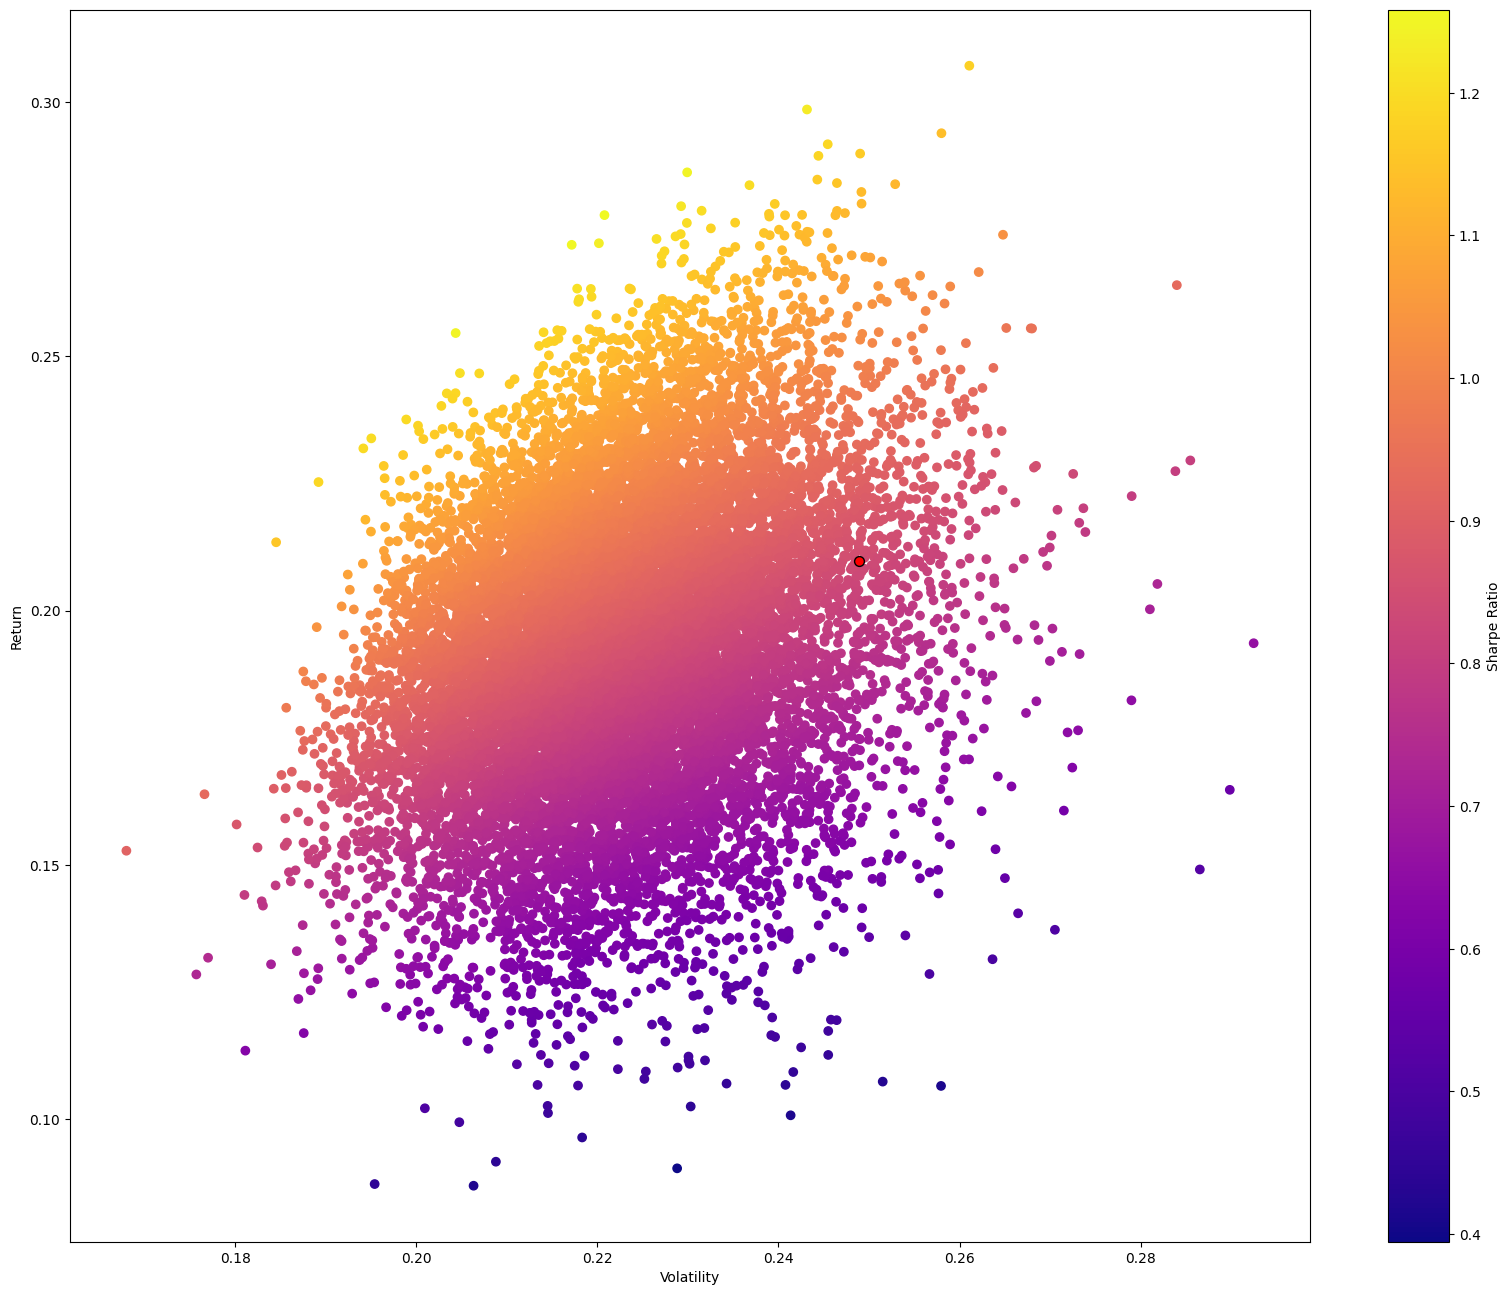

In [ ]:
plt.figure(figsize=(20,16))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Indicating maximum sr value in plot
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')

                                    ******Mathematical Optimization******

In [ ]:
#defining function
def get_ret_vol_sr(weights):
    """
    Takes in weights and returns back an array of mean return, mean volatility and sharpe ratio
    """
    weights = np.array(weights)
    ret = np.sum(log_return.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_return.cov() * 252, weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [ ]:
from scipy.optimize import minimize

In [ ]:
#minimizing negative sharp to maximizing positive sharp
#defining negative sharp function
def neg_sharpe(weights):
    return  get_ret_vol_sr(weights)[2] * -1

Introducing different Risk Profiles for weight allocation

In [ ]:
# Loading the data as done previously

# Define the stock and bond tickers
stock_tickers = ['nike', 'gs', 'apple', 'itc', 'google', 'ongc', 'oracle', 'amazon', 'uber']
bond_tickers = ['vanguard','ubs','artisan']

# Creating a list of all tickers
all_tickers = stock_tickers + bond_tickers


# Defining the constraints
def check_sum(weights):
    return np.sum(weights) - 1.0  # Sum of all weights must equal 1.0

def constraint_aggressive(weights):
    stock_weights = weights[:len(stock_tickers)]
    bond_weights = weights[len(stock_tickers):]

    return [0.9 - np.sum(stock_weights), 0.1 - np.sum(bond_weights)]


def constraint_moderate(weights):
    stock_weights = weights[:len(stock_tickers)]
    bond_weights = weights[len(stock_tickers):]

    return [0.6 - np.sum(stock_weights), 0.4 - np.sum(bond_weights)]

def constraint_conservative(weights):
    stock_weights = weights[:len(stock_tickers)]
    bond_weights = weights[len(stock_tickers):]

    return [0.1 - np.sum(stock_weights), 0.9 - np.sum(bond_weights)]


# Combining all the the constraints
cons =  ({'type': 'eq', 'fun': check_sum} )
cons_aggr = ({'type': 'eq', 'fun': check_sum}, {'type': 'eq', 'fun': constraint_aggressive})
cons_modr = ({'type': 'eq', 'fun': check_sum}, {'type': 'eq', 'fun': constraint_moderate})
cons_cnsrv = ({'type': 'eq', 'fun': check_sum}, {'type': 'eq', 'fun': constraint_conservative})



# Initial guess (equal distribution)
init_guess = all_weights[1,:]

# Setting bounds for each weight (0 to 1)
bounds = [(0, 1) for _ in all_tickers]

# Minimizing the negative Sharpe Ratio to maximize the Sharpe Ratio
opt_results = minimize(neg_sharpe, init_guess, method='SLSQP', bounds=bounds, constraints=cons)
opt_results_aggr = minimize(neg_sharpe, init_guess, method='SLSQP', bounds=bounds, constraints=cons_aggr)
opt_results_modr = minimize(neg_sharpe, init_guess, method='SLSQP', bounds=bounds, constraints=cons_modr)
opt_results_cnsrv = minimize(neg_sharpe, init_guess, method='SLSQP', bounds=bounds, constraints=cons_cnsrv)

# Extracting the optimal weights
optimal_weights= opt_results.x
optimal_weights_aggr = opt_results_aggr.x
optimal_weights_modr = opt_results_modr.x
optimal_weights_cnsrv = opt_results_cnsrv.x




# Calculating and display the expected return, expected volatility, and Sharpe Ratio of the Optimal portfolio
expected_return, expected_volatility, sharpe_ratio = get_ret_vol_sr(optimal_weights)
print("\nExpected Portfolio Metrics (Optimal Portfolio):")
print(f"Expected Return: {expected_return:.4f}")
print(f"Expected Volatility: {expected_volatility:.4f}")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")

# Displaying the optimal weights
print("Optimal Portfolio Weights:")
for ticker, weight in zip(all_tickers, optimal_weights):
    print(f"{ticker}: {weight:.4f}")



# Calculating and display the expected return, expected volatility, and Sharpe Ratio of the aggressive portfolio
expected_return, expected_volatility, sharpe_ratio = get_ret_vol_sr(optimal_weights_aggr)
print("\nExpected Portfolio Metrics (Aggressive Portfolio):")
print(f"Expected Return: {expected_return:.4f}")
print(f"Expected Volatility: {expected_volatility:.4f}")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")


# Displaying the optimal weights for aggressive
print("\nOptimal Portfolio Weights for Aggressive Portfolio:")
for ticker, weight in zip(all_tickers, optimal_weights_aggr):
    print(f"{ticker}: {weight:.4f}")

# Calculate and display the expected return, expected volatility, and Sharpe Ratio of the moderate portfolio
expected_return, expected_volatility, sharpe_ratio = get_ret_vol_sr(optimal_weights_modr)
print("\nExpected Portfolio Metrics (Moderate Portfolio):")
print(f"Expected Return: {expected_return:.4f}")
print(f"Expected Volatility: {expected_volatility:.4f}")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")

# Display the optimal weights for moderate
print("\nOptimal Portfolio Weights for Modertae Portfolio:")
for ticker, weight in zip(all_tickers, optimal_weights_modr):
    print(f"{ticker}: {weight:.4f}")

# Calculating and displaying the expected return, expected volatility, and Sharpe Ratio of the conservative portfolio
expected_return, expected_volatility, sharpe_ratio = get_ret_vol_sr(optimal_weights_cnsrv)
print("\nExpected Portfolio Metrics (Conservative Portfolio):")
print(f"Expected Return: {expected_return:.4f}")
print(f"Expected Volatility: {expected_volatility:.4f}")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")


# Displaying the optimal weights for conservative
print("\nOptimal Portfolio Weights for Conservative Portfolio:")
for ticker, weight in zip(all_tickers, optimal_weights_cnsrv):
    print(f"{ticker}: {weight:.4f}")



Expected Portfolio Metrics (Optimal Portfolio):
Expected Return: 0.2927
Expected Volatility: 0.1932
Sharpe Ratio: 1.5148
Optimal Portfolio Weights:
nike: 0.0000
gs: 0.0000
apple: 0.4198
itc: 0.0000
google: 0.1376
ongc: 0.0000
oracle: 0.0000
amazon: 0.0000
uber: 0.4426
vanguard: 0.0000
ubs: 0.0000
artisan: 0.0000

Expected Portfolio Metrics (Aggressive Portfolio):
Expected Return: 0.4410
Expected Volatility: 0.2988
Sharpe Ratio: 1.4759

Optimal Portfolio Weights for Aggressive Portfolio:
nike: 0.1299
gs: 0.0000
apple: 0.6565
itc: 0.0000
google: 0.1135
ongc: 0.0000
oracle: 0.0000
amazon: 0.0000
uber: 0.0000
vanguard: 0.0000
ubs: 0.0000
artisan: 0.1000

Expected Portfolio Metrics (Moderate Portfolio):
Expected Return: 0.3330
Expected Volatility: 0.2656
Sharpe Ratio: 1.2538

Optimal Portfolio Weights for Modertae Portfolio:
nike: 0.3148
gs: 0.0000
apple: 0.2852
itc: 0.0000
google: 0.0000
ongc: 0.0000
oracle: 0.0000
amazon: 0.0000
uber: 0.0000
vanguard: 0.0000
ubs: 0.1133
artisan: 0.2867

